# Regresión logística
La regresión logística es un modelo de clasificación lineal, es decir, un modelo que crea una decisión que es lineal en el espacio de entrada. Esto significa que el umbral de separación es una recta que separa los distintos grupos o clase. Es un algoritmo de clasificación que es usado para predecir la probabilidad de una variable dependiente categórica.

En la regresión logística, la variable dependiente binaria puede tomar los valores 0 o 1. La regresión logística predice la probabilidad de que la variable dependiente Y sea 1 en función de una serie de variables independientes X. Es decir, predice P(Y=1) como función de X. Es el algoritmo análogo de la regresión lineal pero aplicado a problemas de clasificación. La diferencia más grande es que en la regresión logística los coeficientes se ajustan con la función de máxima verosimilitud en vez de con mínimos cuadrados ordinarios (OLS).

In [33]:
# Librerias
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.svm import LinearSVC
import mglearn
%matplotlib inline

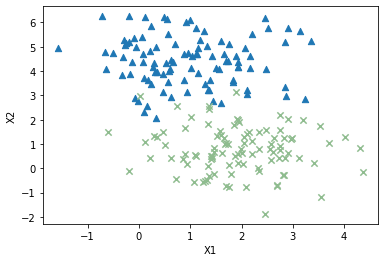

In [3]:
# crear dataset sintético
X, y = make_blobs(centers=2, random_state=0, n_samples=200)
plt.scatter(X[y==0,0], X[y==0,1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y==1,0], X[y==1,1], s=40, label="Clase Y=1", marker="x", color="darkseagreen")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

A continuación se dividen los datos en train + test y se entrena una regresión logística con los datos de train. Posteriormente se predice test. El modelo de regresión logística permite devolver probabilidades de cada clase (predict_proba) o la predicción de la clase como tal (predict). Suponiendo que una clase tenga Y=0 y la otra Y=1, puede devolver las probabilidades (probY0, probY1) o la predicción (Y0 o Y1).

In [8]:
# crear juegos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234, stratify=y)
print(u'Dimensiones en train \n-X:{}\n-Y{}'.format(X_train.shape, y_train.shape))
print(u'Dimensiones en test  \n-X:{}\n-Y{}'.format(X_test.shape, y_test.shape))

Dimensiones en train 
-X:(150, 2)
-Y(150,)
Dimensiones en test  
-X:(50, 2)
-Y(50,)


In [9]:
# ajuste de una regresión logística a train
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(u'Parámetros de la logística \n- Intercerptor: {} \n- Coeficientes: {}'.format(clf.intercept_, clf.coef_))

Parámetros de la logística 
- Intercerptor: [5.14609874] 
- Coeficientes: [[ 0.89634307 -2.62074832]]


In [10]:
# predicción del conjunto de test
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)
print(u'Ejemplo de predicción: {}'.format(y_test_prob[:1]))

Ejemplo de predicción: [[0.01425345 0.98574655]]


A continuación se obtienen ciertas métricas utilizando las predicciones y los valores reales de `y_test`.

In [14]:
# métricas
auc = roc_auc_score(y_test, y_test_prob[:, 1])
print("- Precision: ", round(precision_score(y_test, y_test_pred),2))
print("- Recall : ", recall_score(y_test, y_test_pred))
print("- F-Score : ", round(f1_score(y_test, y_test_pred), 2))
print("- AUC: ", round(auc, 2))

- Precision:  0.96
- Recall :  0.88
- F-Score :  0.92
- AUC:  0.99


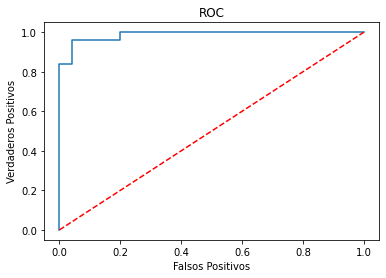

In [22]:
# Curva AUC
fpr, tpr, thrs = roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

Se representa la ROC, que es una de las representaciones que más se utilizan en problemas de clasificación binaria. La curva ROC es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación. Otra forma de interpretarla es como la representación de la ratio de verdaderos positivos frente a la ratio de falsos positivos según se varía el umbral de discriminación, es decir, el valor a partir del cual decidimos que un caso es un positivo.  

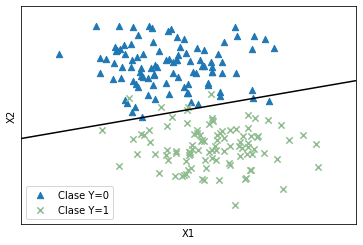

In [34]:
# separando los datos en la visualización
plt.scatter(X[y==0,0], X[y==0,1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y==1,0], X[y==1,1], s=40, label="Clase Y=1", marker="x", color="darkseagreen")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc="best")
mglearn.plots.plot_2d_separator(clf, X)
plt.show()